<h2>Handwritten Digit Recognition</h2><br>
</t>LGMVIP-DataScience-Task-5<br>
<br>
Author - Narendra Chatterjee

In [1]:
#importing all required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
#importing mnist dataset from tensorflow
mnist = tf.keras.datasets.mnist

In [3]:
#Splitting the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("The shape of X_train : ", X_train.shape)
print("The shape of y_train : ", y_train.shape)
print("The shape of X_test  : ", X_test.shape)
print("The shape of y_test  : ", y_test.shape)

The shape of X_train :  (60000, 28, 28)
The shape of y_train :  (60000,)
The shape of X_test  :  (10000, 28, 28)
The shape of y_test  :  (10000,)


In [5]:
#Showing the Visualized format of X_train datasets
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

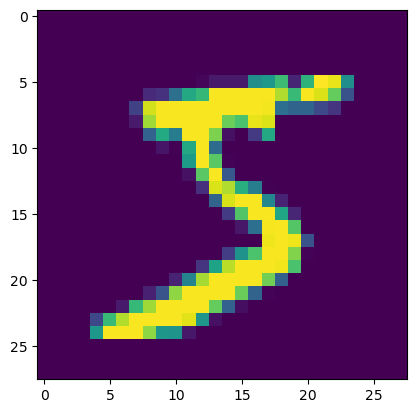

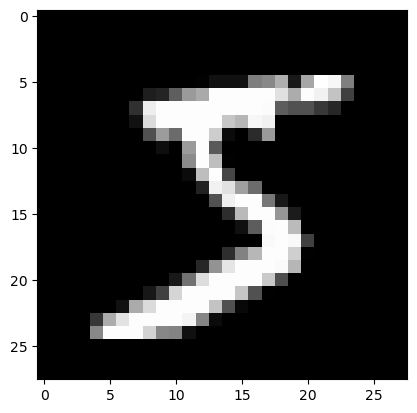

In [6]:
#Visualizing the X_train[0] data in Image Graphical Form
plt.imshow(X_train[0])
plt.show()
plt.imshow(np.invert(X_train[0]), cmap=plt.cm.binary)

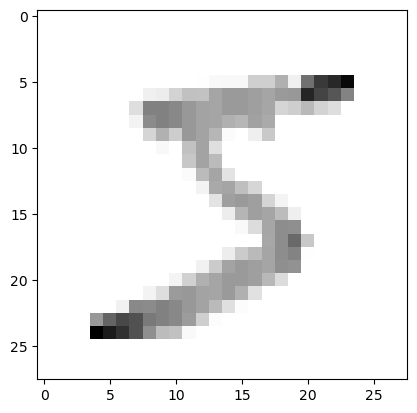

In [7]:
# Normalise the Datasets
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [8]:
# After Normalize
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
# Resizing Image to make it suitable for applying Convolutional Operation
X_trainr = np.array(X_train).reshape(-1, 28, 28, 1)
X_testr = np.array(X_test).reshape(-1, 28, 28, 1)
print("Training Sample Dimension: ", X_trainr.shape)
print("Testing Sample Dimension: ", X_testr.shape)

Training Sample Dimension:  (60000, 28, 28, 1)
Testing Sample Dimension:  (10000, 28, 28, 1)


In [11]:
#Creating a Model of Convolutional Neural Network (CNN)

# Create a Neural Network 
model = Sequential()

# First Convolutional Layer ---> Layer 0 1 2 3 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Layer ---> Layer 4 5 6 7 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Layer ---> Layer 8 9 10 11 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

# Fully Connected Layer #3
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully Connected Layer 
model.add(Dense(10))
model.add(Activation("sigmoid"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [13]:
#Compiling the CNN Model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [14]:
#Fitting the Model
history = model.fit(X_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 22s 16ms/step - loss: 1.0246 - accuracy: 0.7873 - val_loss: 0.4372 - val_accuracy: 0.9440
Epoch 2/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.2854 - accuracy: 0.9553 - val_loss: 0.1813 - val_accuracy: 0.9686
Epoch 3/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1504 - accuracy: 0.9704 - val_loss: 0.1313 - val_accuracy: 0.9680
Epoch 4/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1014 - accuracy: 0.9774 - val_loss: 0.0984 - val_accuracy: 0.9769
Epoch 5/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0769 - accuracy: 0.9820 - val_loss: 0.0874 - val_accuracy: 0.9776


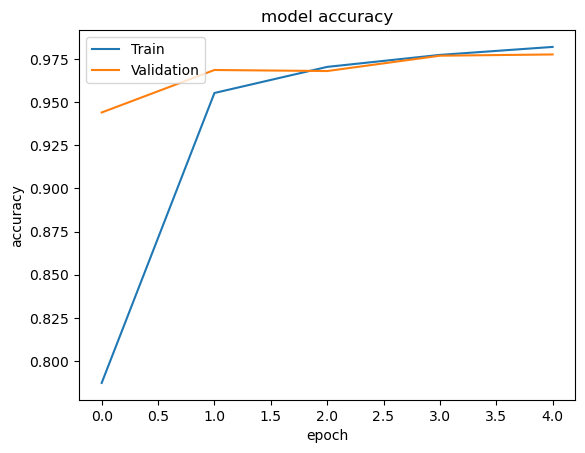

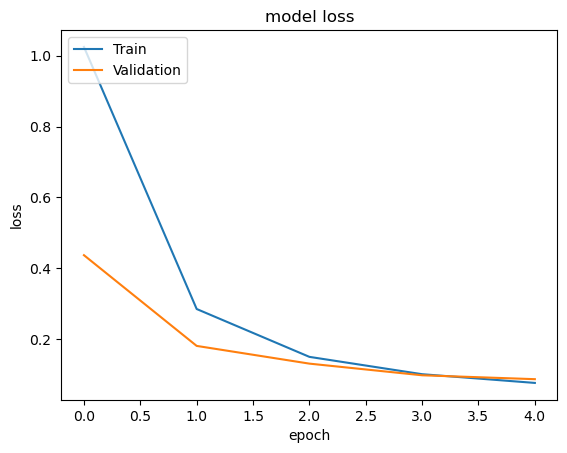

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
# Evaluating on Testing dataset MNIST
test_loss, test_acc = model.evaluate(X_testr, y_test)
print("Test Loss on 10000 Test Samples: ", test_loss)
print("Validation Accuracy on 10000 test samples: ", test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0863 - accuracy: 0.9784
Test Loss on 10000 Test Samples:  0.08634240180253983
Validation Accuracy on 10000 test samples:  0.9783999919891357


In [17]:
#saving the model
model.save('model.h5')